In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
class_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv("magic04.data", names=class_names)
#pd.read_csv("magic04.data")

In [7]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [8]:
df["class"] = (df["class"] == "g").astype(int)

In [9]:
type(df["class"])

pandas.core.series.Series

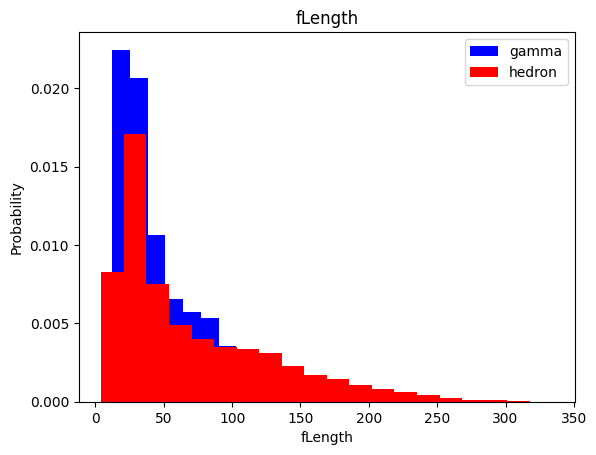

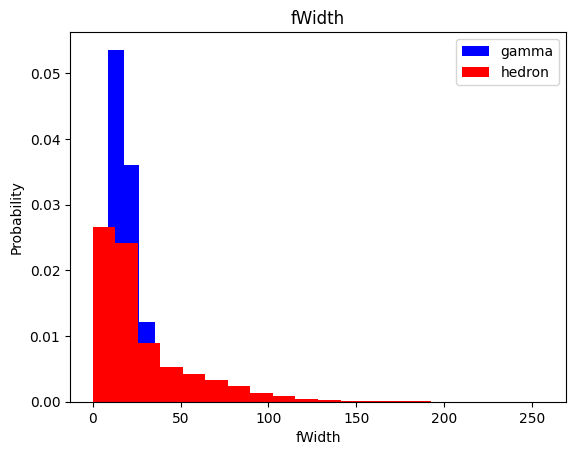

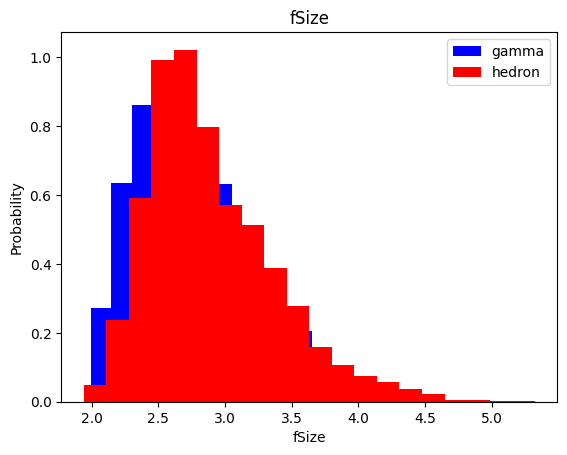

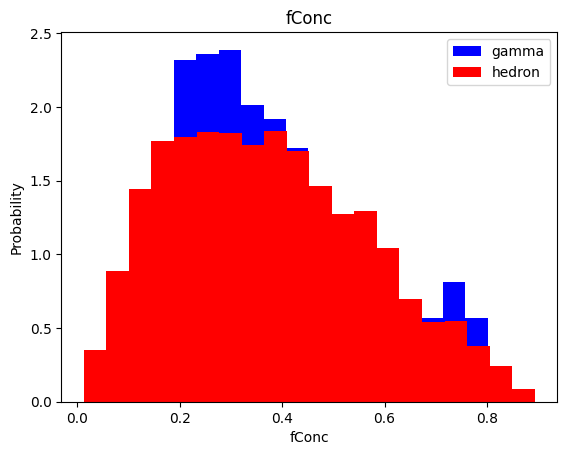

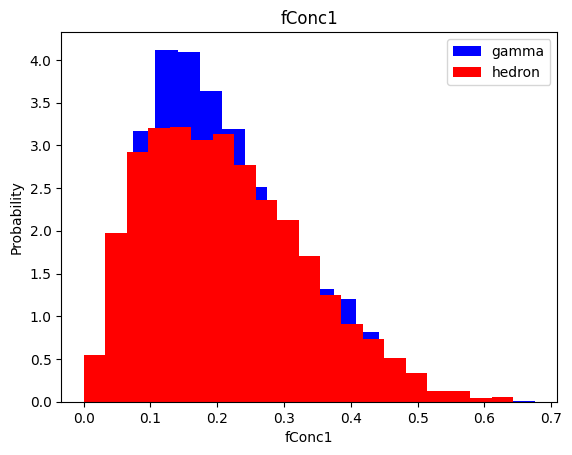

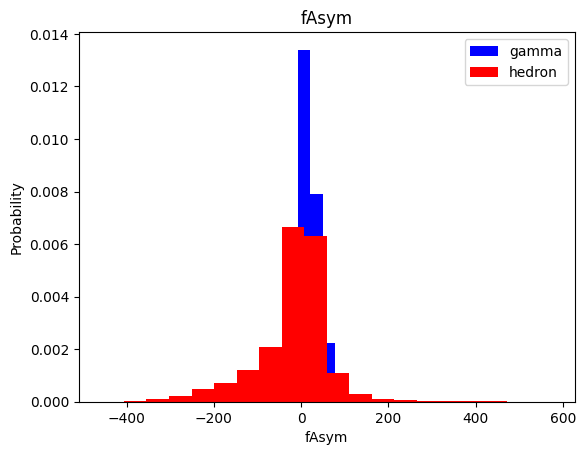

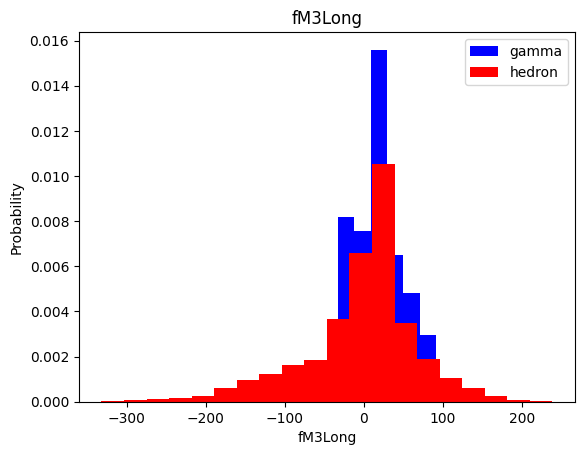

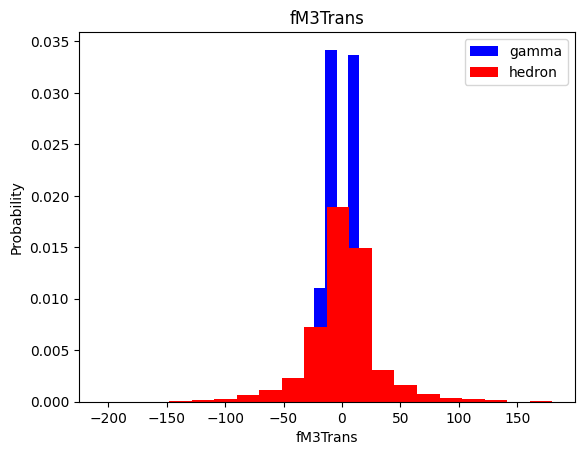

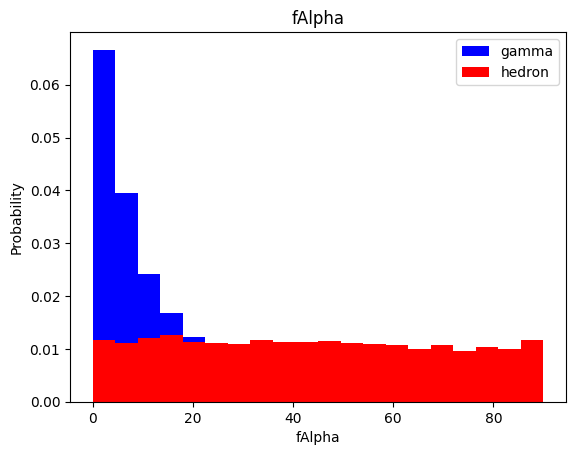

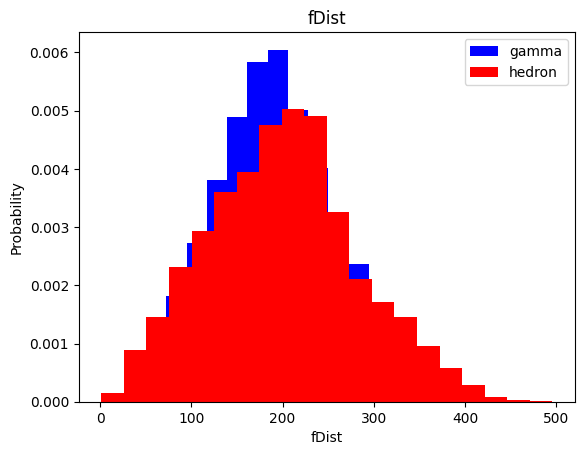

In [9]:
for label in df.columns[:-1]:
    plt.hist(df[df["class"]==1][label], 20,  color='blue', label='gamma', density=True)
    plt.hist(df[df["class"]==0][label], 20,  color='red', label='hedron', density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\musan\.conda\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

In [29]:
(df[df.columns[-1]].values).shape

(19020,)

In [13]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

In [23]:
sum(y_valid == 1)

2449

In [24]:
sum(y_valid == 0)

2449

# KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [43]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [44]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1364
           1       0.83      0.90      0.86      2440

    accuracy                           0.82      3804
   macro avg       0.81      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1364
           1       0.85      0.86      0.85      2440

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1364
           1       0.85      0.88      0.87      2440

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.83      0.82      3804



# Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [50]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.40      0.52      1364
           1       0.73      0.93      0.82      2440

    accuracy                           0.74      3804
   macro avg       0.74      0.66      0.67      3804
weighted avg       0.74      0.74      0.71      3804



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

In [56]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1364
           1       0.84      0.83      0.84      2440

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [57]:
from sklearn.svm import SVC

In [58]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [59]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1364
           1       0.88      0.91      0.90      2440

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Linera regression with new dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [62]:
filepath = r"C:\Users\musan\Downloads\Seoul_Bike_Sharing_Demand_Prediction\SeoulBikeData.csv"

df = pd.read_csv(filepath, encoding='latin1')

In [64]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [69]:
df["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [70]:
df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [73]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "season", "holiday", "functional"]

In [71]:
df = df.drop(["Date"], axis=1)

In [72]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [74]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [75]:
df.columns = dataset_cols

In [76]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [77]:
df["functional"] = (df["functional"] == "yes").astype(int)
df["holiday"] = (df["holiday"] == "Holiday").astype(int)


In [104]:
df1 = df
value = 0

In [114]:
df1.loc[df1["season"] == "Autumn", "season"] = 3

In [116]:
df["season"].unique()

array([0, 1, 2, 3], dtype=object)

In [117]:
df1

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0


In [80]:
for sezon in df1["season"].unique():
    df1[df1["season"] == sezon] = value
    value = value + 1

Winter
Spring
Summer
Autumn


In [78]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0


In [ ]:
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [87]:
df = df.drop(["functional"], axis=1)

In [88]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0


In [93]:
for i in ["season","holiday"]:
    print("Unique " + str(i) + " is: ", df[i].unique())

Unique season is:  ['Winter' 'Spring' 'Summer' 'Autumn']
Unique holiday is:  [0 1]


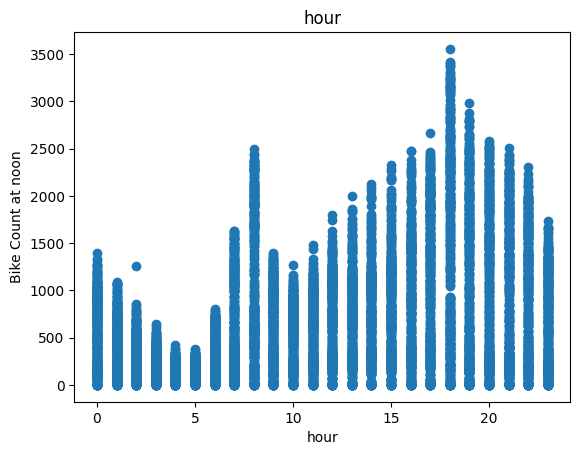

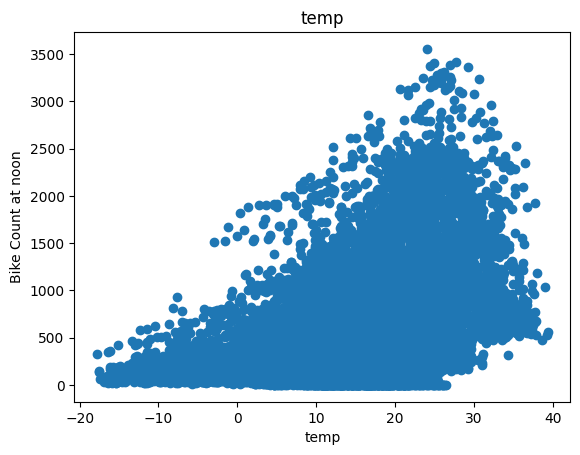

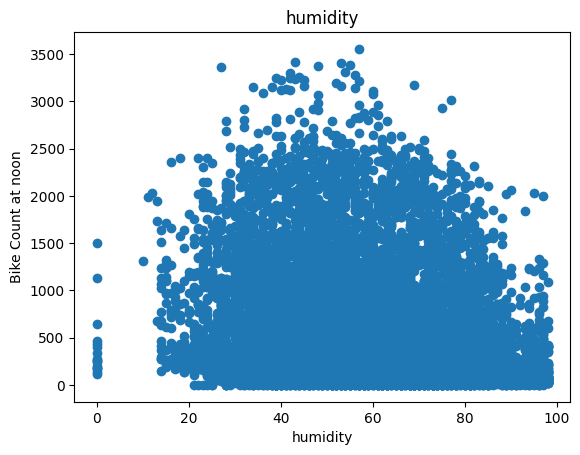

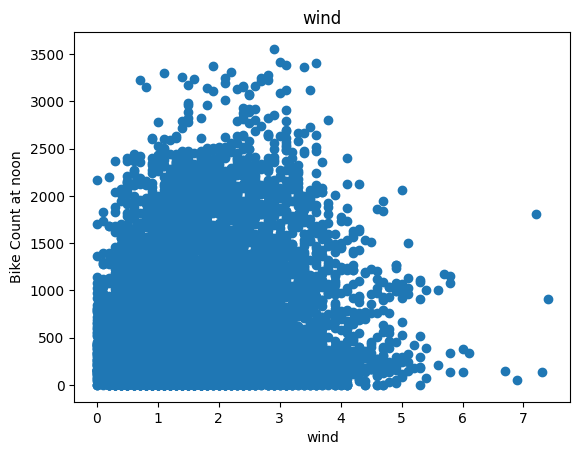

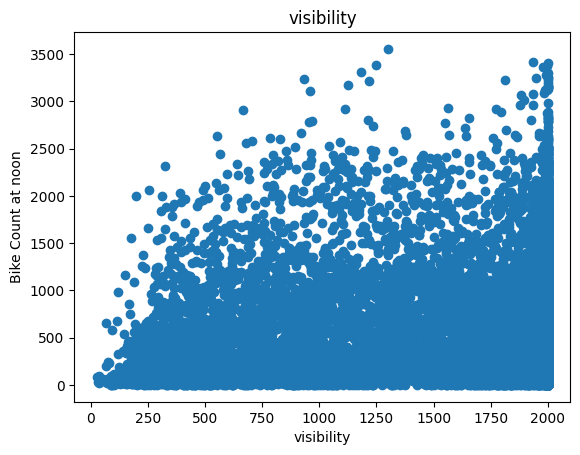

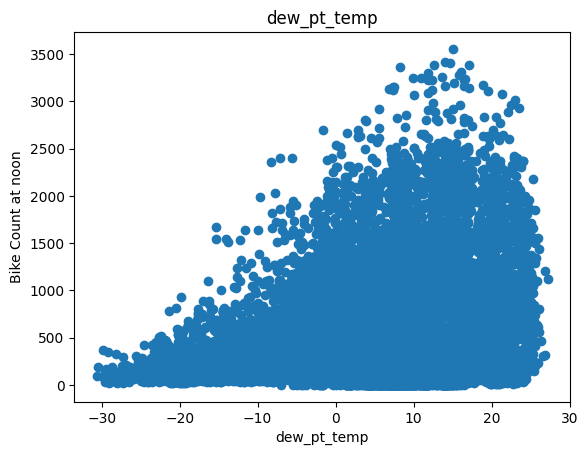

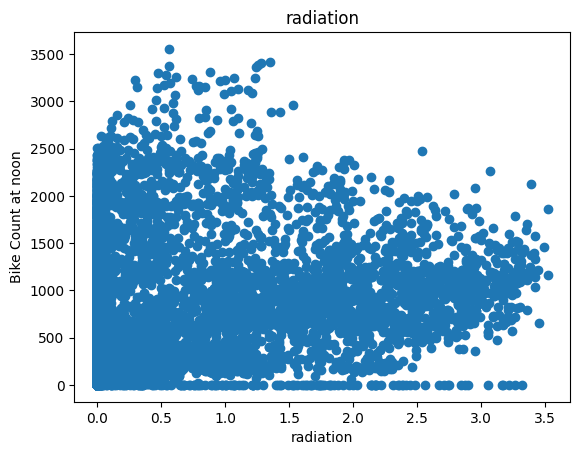

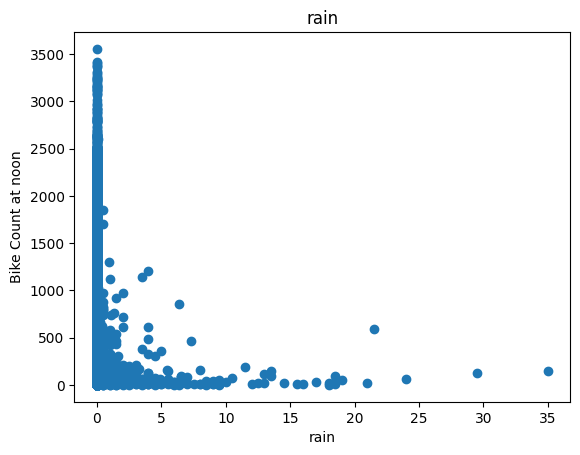

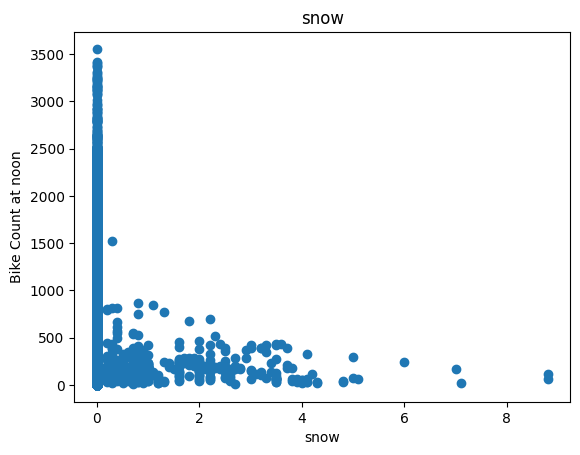

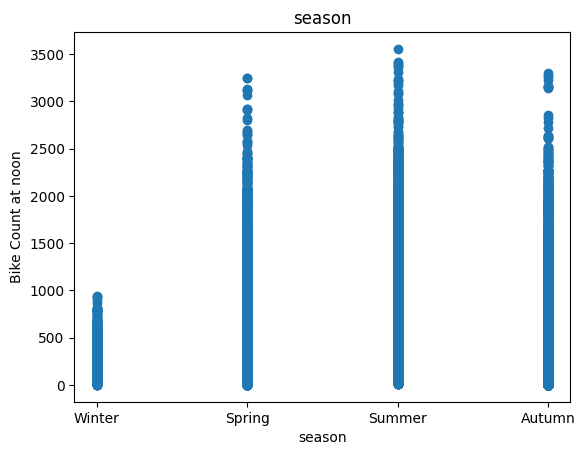

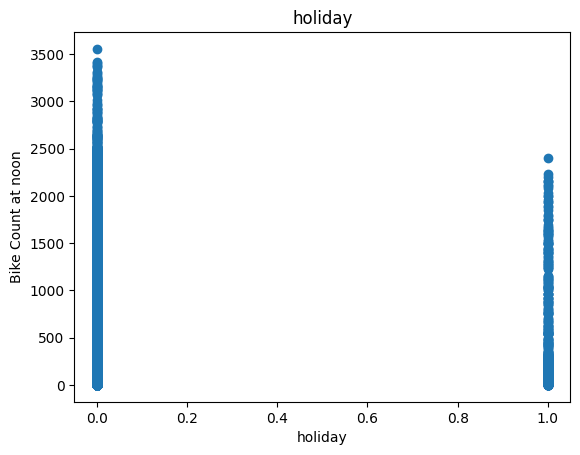

In [94]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike Count at noon")
    plt.show()

In [15]:
#df = df.drop(["wind", "visibility", "functional"], axis=1)

In [95]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0


# Train test Valid split

In [121]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\musan\.conda\envs\thesis\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [97]:
train

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
8090,0,2,7.6,68,1.2,1170,2.0,0.00,0.0,0.0,Autumn,0
7491,0,3,11.0,66,0.9,2000,4.8,0.00,0.0,0.0,Autumn,1
8281,518,1,8.8,89,0.7,213,7.0,0.00,0.0,0.0,Autumn,0
3406,1292,22,16.7,28,1.0,1996,-1.9,0.00,0.0,0.0,Spring,0
1590,110,6,-11.5,40,2.3,2000,-22.4,0.00,0.0,0.0,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3515,930,11,18.1,42,2.7,1112,4.9,2.17,0.0,0.0,Spring,0
7918,680,22,10.5,72,2.4,2000,5.6,0.00,0.0,0.0,Autumn,0
323,247,11,-6.1,38,1.0,1587,-18.1,0.52,0.0,0.0,Winter,0
2741,60,5,5.0,83,0.7,200,2.3,0.00,0.0,0.0,Spring,0


In [122]:
def get_xy(dataframe, x_label=None, y_label=None):

    if x_label is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values

    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data, X, y

In [20]:
_, X_train_temp, y_train_temp = get_xy(train, x_label=["temp"], y_label = "bike_count")
_, X_val_temp, y_val_temp = get_xy(val, x_label=["temp"], y_label = "bike_count")
_, X_train_temp, y_train_temp = get_xy(test, x_label=["temp"], y_label = "bike_count")

In [18]:
X_train_temp

array([[  1. ],
       [  2.5],
       [ 19.9],
       [ -7.8],
       [ 34.5],
       [  9.8],
       [ 10.4],
       [ 33.6],
       [ 23.7],
       [ 24.3],
       [ 16.6],
       [  6.9],
       [  4.8],
       [ 24.8],
       [ 28.2],
       [ 12.3],
       [ 34.1],
       [ 12.5],
       [  5.6],
       [ 10.6],
       [ 17.8],
       [ 23.4],
       [ 22.9],
       [ -1.5],
       [ 18. ],
       [-11.3],
       [  7.6],
       [  3.2],
       [ 23.7],
       [  2.2],
       [  6.9],
       [  2.2],
       [ -1.6],
       [  9. ],
       [ 22.6],
       [-12.2],
       [ 21.2],
       [ 13.2],
       [ -9.6],
       [ 27. ],
       [ 20.8],
       [ 18.4],
       [  7.6],
       [ 20.1],
       [ 10.8],
       [ 13.2],
       [ 21.7],
       [ 33.7],
       [ -2.7],
       [ 32. ],
       [ 19. ],
       [ -2.5],
       [  2.9],
       [ 25. ],
       [  7.7],
       [  8.6],
       [  4.3],
       [ 16.5],
       [ 31.9],
       [ 18.2],
       [  4.3],
       [ 33.2],
       [

In [19]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [34]:
temp_reg.score(X_test_temp, y_test_temp)

0.2980551774048541

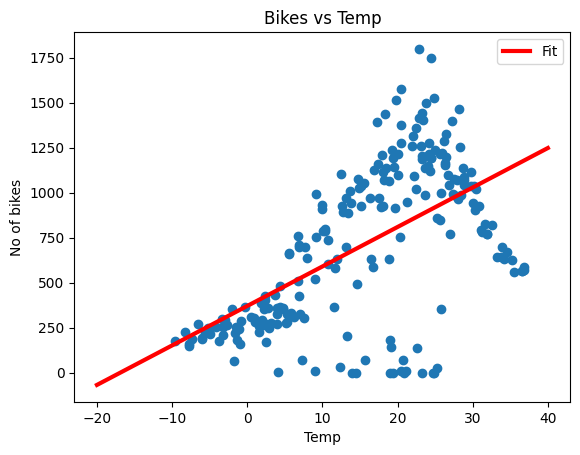

In [42]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No of bikes")
plt.show()

# Non Linear regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_temp)

In [27]:
X_train_temp

array([[  1. ],
       [  2.5],
       [ 19.9],
       [ -7.8],
       [ 34.5],
       [  9.8],
       [ 10.4],
       [ 33.6],
       [ 23.7],
       [ 24.3],
       [ 16.6],
       [  6.9],
       [  4.8],
       [ 24.8],
       [ 28.2],
       [ 12.3],
       [ 34.1],
       [ 12.5],
       [  5.6],
       [ 10.6],
       [ 17.8],
       [ 23.4],
       [ 22.9],
       [ -1.5],
       [ 18. ],
       [-11.3],
       [  7.6],
       [  3.2],
       [ 23.7],
       [  2.2],
       [  6.9],
       [  2.2],
       [ -1.6],
       [  9. ],
       [ 22.6],
       [-12.2],
       [ 21.2],
       [ 13.2],
       [ -9.6],
       [ 27. ],
       [ 20.8],
       [ 18.4],
       [  7.6],
       [ 20.1],
       [ 10.8],
       [ 13.2],
       [ 21.7],
       [ 33.7],
       [ -2.7],
       [ 32. ],
       [ 19. ],
       [ -2.5],
       [  2.9],
       [ 25. ],
       [  7.7],
       [  8.6],
       [  4.3],
       [ 16.5],
       [ 31.9],
       [ 18.2],
       [  4.3],
       [ 33.2],
       [

In [31]:
X_poly_2 = X_poly[:,1]
X_poly_2 = X_poly_2.reshape(-1,1)
X_poly_2.shape

(73, 1)

In [32]:
X_poly_2

array([[1.00000e+00],
       [6.25000e+00],
       [3.96010e+02],
       [6.08400e+01],
       [1.19025e+03],
       [9.60400e+01],
       [1.08160e+02],
       [1.12896e+03],
       [5.61690e+02],
       [5.90490e+02],
       [2.75560e+02],
       [4.76100e+01],
       [2.30400e+01],
       [6.15040e+02],
       [7.95240e+02],
       [1.51290e+02],
       [1.16281e+03],
       [1.56250e+02],
       [3.13600e+01],
       [1.12360e+02],
       [3.16840e+02],
       [5.47560e+02],
       [5.24410e+02],
       [2.25000e+00],
       [3.24000e+02],
       [1.27690e+02],
       [5.77600e+01],
       [1.02400e+01],
       [5.61690e+02],
       [4.84000e+00],
       [4.76100e+01],
       [4.84000e+00],
       [2.56000e+00],
       [8.10000e+01],
       [5.10760e+02],
       [1.48840e+02],
       [4.49440e+02],
       [1.74240e+02],
       [9.21600e+01],
       [7.29000e+02],
       [4.32640e+02],
       [3.38560e+02],
       [5.77600e+01],
       [4.04010e+02],
       [1.16640e+02],
       [1.

In [24]:
y_train_temp.shape

(73, 1)

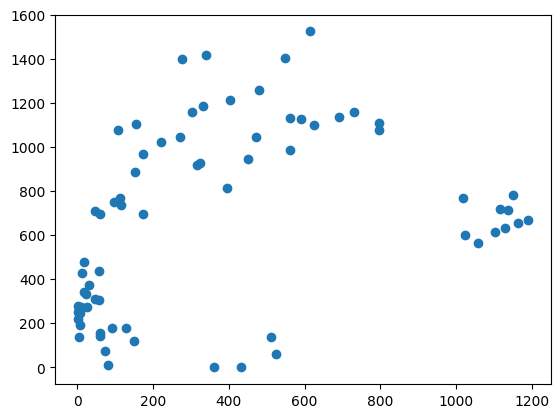

In [33]:
plt.scatter(X_poly_2, y_train_temp)

In [34]:
model = LinearRegression()
model.fit(X_poly_2, y_train_temp)

LinearRegression()

In [ ]:
X_poly = poly.fit_transform(X_train_temp)

In [36]:
model.score(X_val_temp, y_val_temp)

-0.42807657496440243

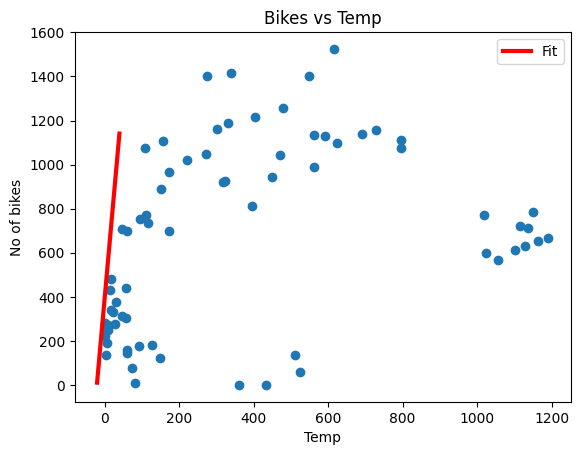

In [37]:
plt.scatter(X_poly_2, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No of bikes")
plt.show()

# Multiple Linera regression

In [99]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_pt_temp', 'radiation', 'rain', 'snow', 'season', 'holiday'],
      dtype='object')

In [123]:
_, X_train_all, y_train_all = get_xy(train, x_label=df.columns[1:], y_label = "bike_count")
_, X_val_all, y_val_all = get_xy(val, x_label=df.columns[1:], y_label = "bike_count")
_, X_test_all, y_test_all = get_xy(test, x_label=df.columns[1:], y_label = "bike_count")

In [124]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0


In [125]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [126]:
all_reg.score(X_test_all, y_test_all)

0.48035850003431146

## Multiple regression with data normalization

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_train_all)
X_test_standardized = scaler.fit_transform(X_test_all)

In [133]:
X_standardized[0]

array([ 0.93769618,  0.81873447, -0.94791322,  1.03253581,  0.3609364 ,
        0.29643161,  0.61619627, -0.12659767, -0.16468584, -0.45172109,
       -0.23451651])

In [134]:
X_train_all[0]

array([18, 22.6, 39, 2.8, 1655, 7.9, 1.1, 0.0, 0.0, 1, 0], dtype=object)

In [130]:
std_reg = LinearRegression()
std_reg.fit(X_standardized, y_train_all)
std_reg.score(X_test_standardized, y_test_all)

0.4840003753185649

In [135]:
y_test_all

array([[1078],
       [ 363],
       [ 299],
       ...,
       [  44],
       [ 352],
       [2273]], dtype=int64)

In [138]:
y_pred

array([[1136.5455772 ],
       [ 582.79744963],
       [ 954.67033451],
       ...,
       [ 189.33042191],
       [ 336.75405665],
       [1404.04007328]])

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = std_reg.predict(X_test_standardized)
mse = mean_squared_error(y_test_all, y_pred)

In [137]:
mse

223058.4524929503

In [172]:
x_input = np.array([11, 25, 55, 2.9, 1655, 8, 1.1, 0.0, 0.0, 0, 1])
x_input = x_input.reshape(-1,1)
x_input = scaler.fit_transform(x_input)
x_input = x_input.reshape(1,-1)
print(x_input)
y_output = std_reg.predict(x_input)
y_output

[[-0.31478182 -0.28518695 -0.22176937 -0.33190457  3.16050176 -0.32112358
  -0.33570963 -0.33803494 -0.33803494 -0.33803494 -0.33592102]]


array([[595.02159652]])

In [146]:
X_standardized.shape

(5256, 11)

In [141]:
df.columns[1:]

Index(['hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'season', 'holiday'],
      dtype='object')

## So score got increased from 60% to 61%

## Min Max scaling

In [131]:
min_max_sclr = MinMaxScaler()
X_min_max_train = min_max_sclr.fit_transform(X_train_all)
X_min_max_test = min_max_sclr.fit_transform(X_test_all)


In [132]:
min_max_reg = LinearRegression()
min_max_reg.fit(X_min_max_train, y_train_all)
min_max_reg.score(X_min_max_test, y_test_all)

0.4845421564510096

In [47]:
X_std_min_max_train = min_max_sclr.fit_transform(X_standardized)
X_std_min_max_test = min_max_sclr.fit_transform(X_test_standardized)

In [48]:
std_min_max_reg = LinearRegression()
std_min_max_reg.fit(X_std_min_max_train, y_train_all)
std_min_max_reg.score(X_std_min_max_test, y_test_all)

0.6115036684146574

In [49]:
X_std_min_max_train

array([[0.31653226, 0.46987952, 0.43560606, 0.4005848 , 0.        ,
        0.        ],
       [0.64314516, 0.14457831, 0.52840909, 0.79824561, 0.        ,
        0.        ],
       [0.74395161, 0.79518072, 0.92992424, 0.21052632, 0.        ,
        0.        ],
       ...,
       [0.74596774, 0.43373494, 0.79166667, 0.83333333, 0.        ,
        0.        ],
       [0.76209677, 0.5060241 , 0.83901515, 0.93274854, 0.        ,
        0.        ],
       [0.70564516, 0.43373494, 0.75568182, 0.7748538 , 0.        ,
        0.        ]])

# Unsupervised Learning

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv(r"C:\Users\musan\Downloads\seeds\seeds_dataset.txt", names=cols, sep="\s+")

In [6]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


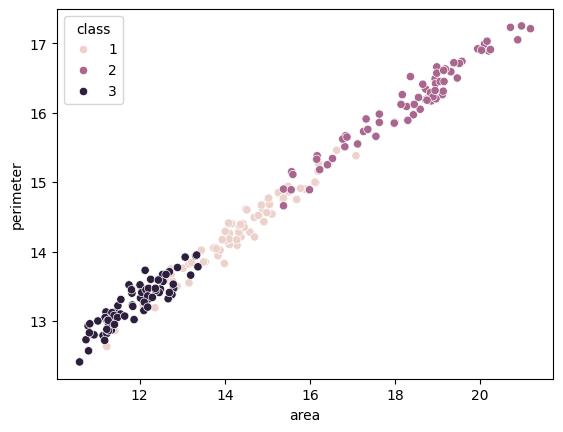

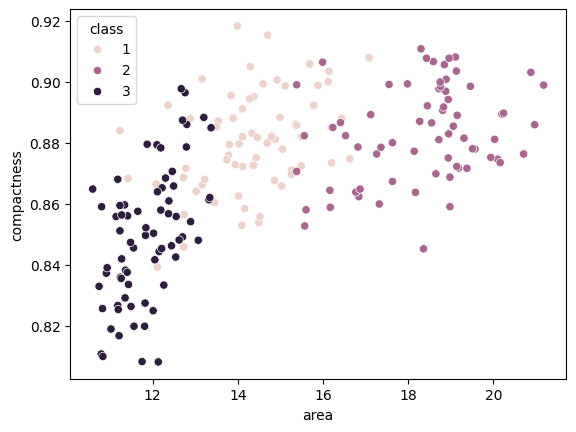

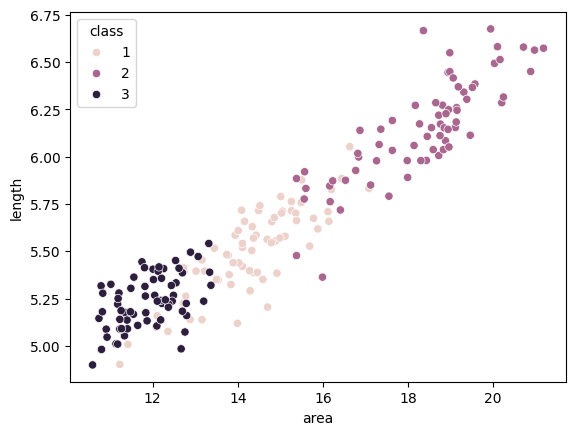

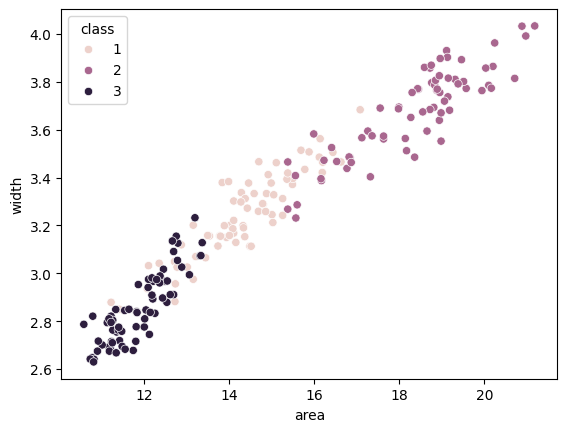

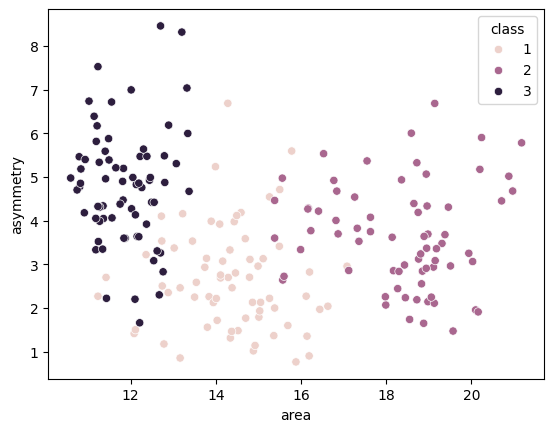

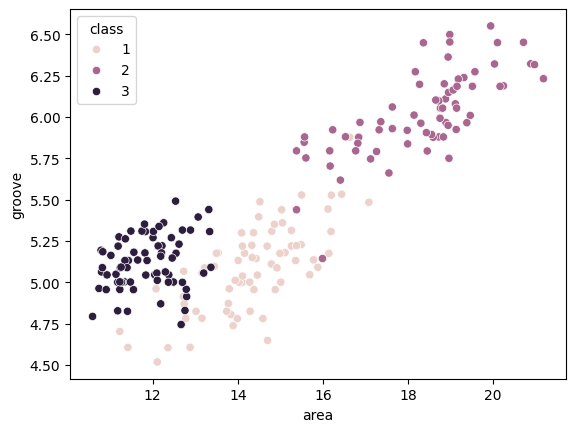

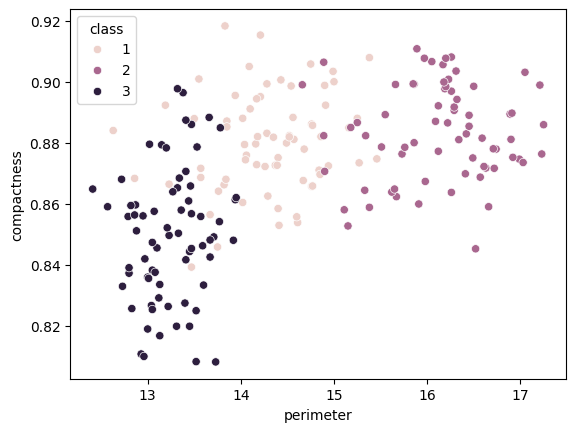

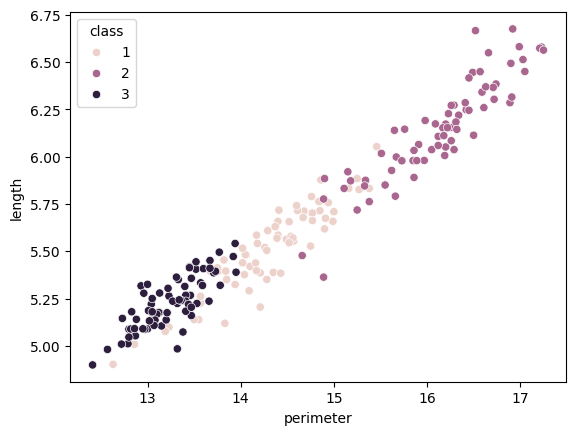

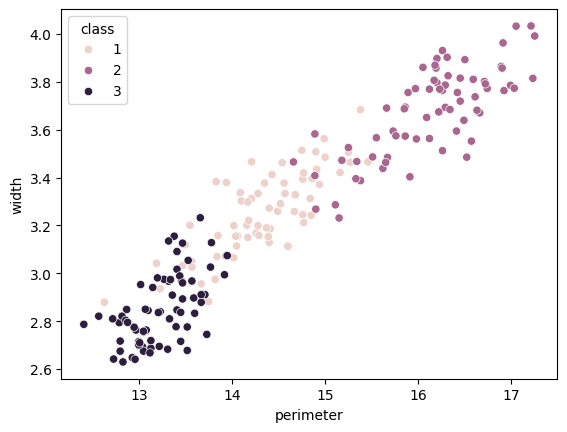

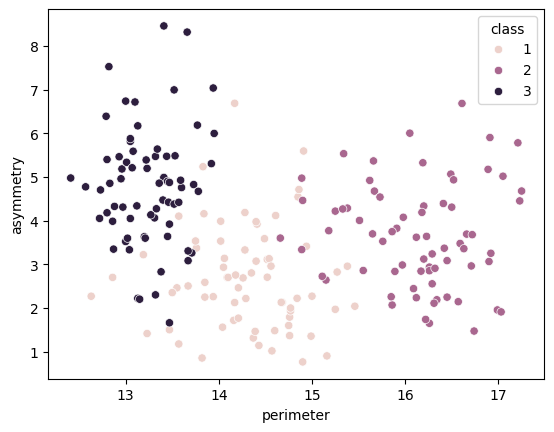

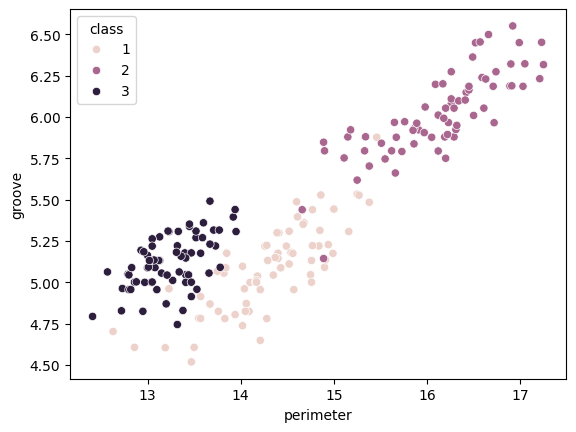

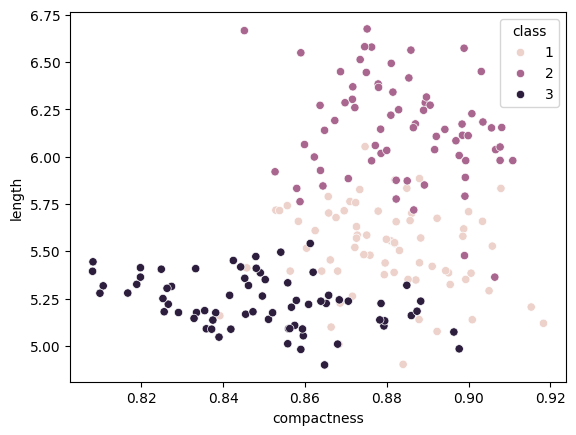

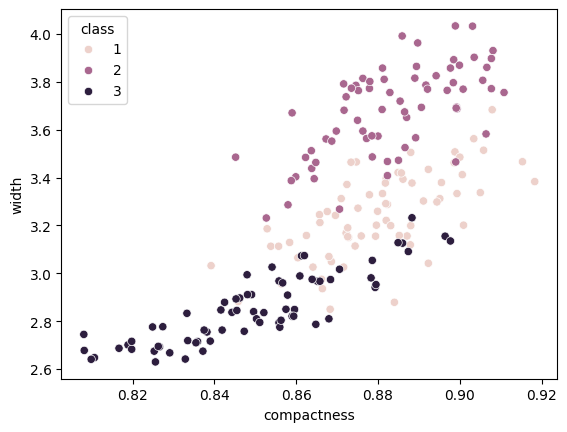

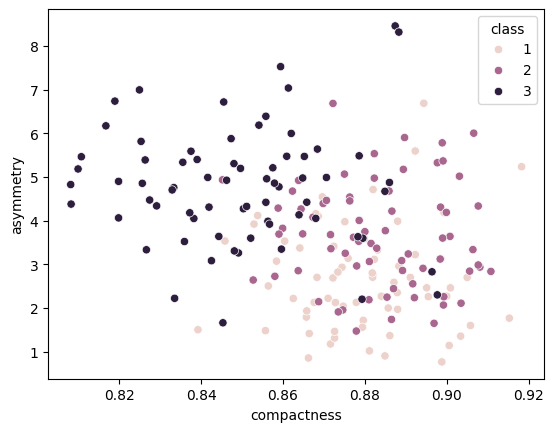

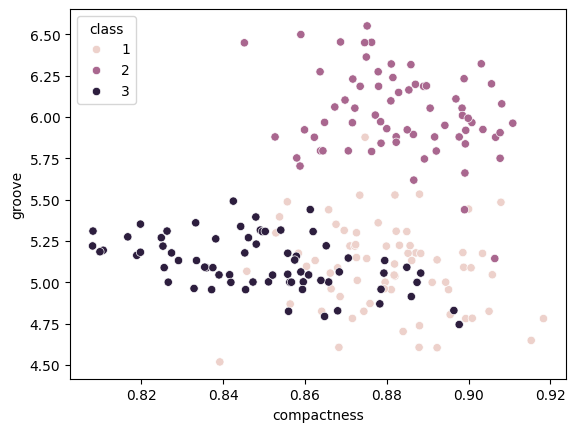

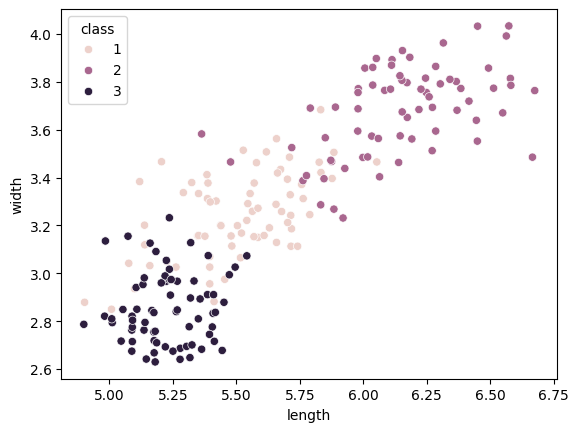

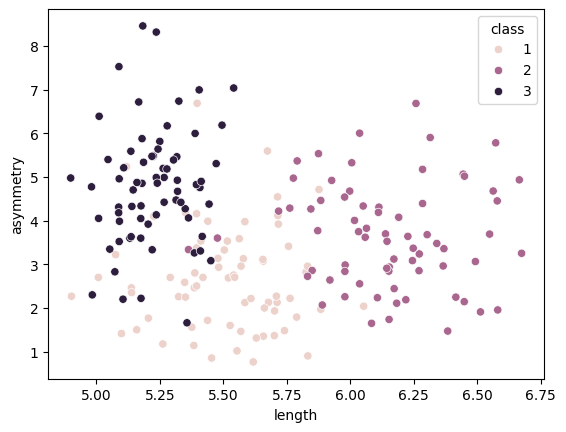

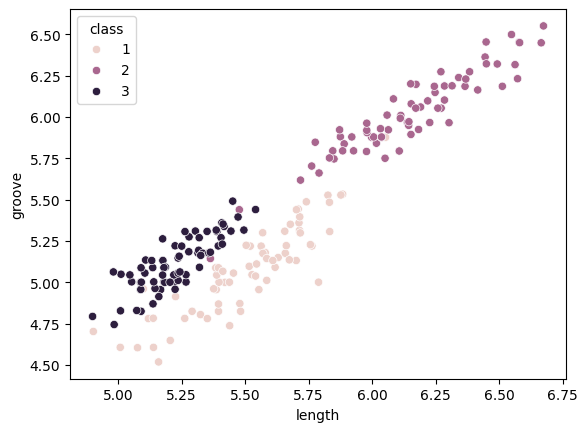

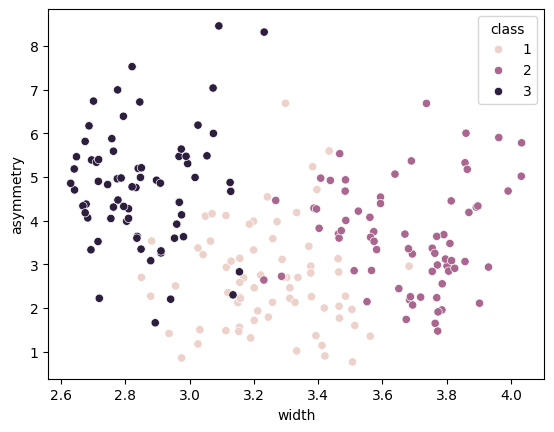

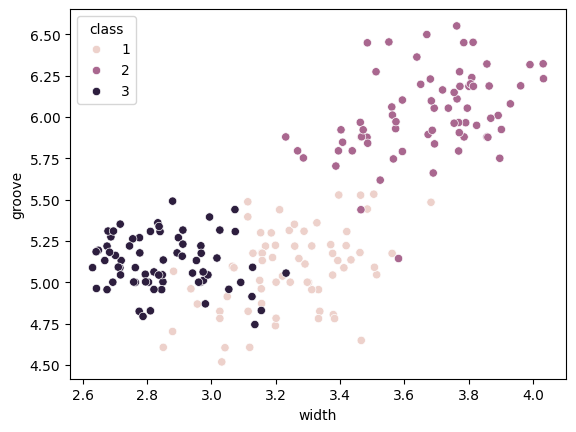

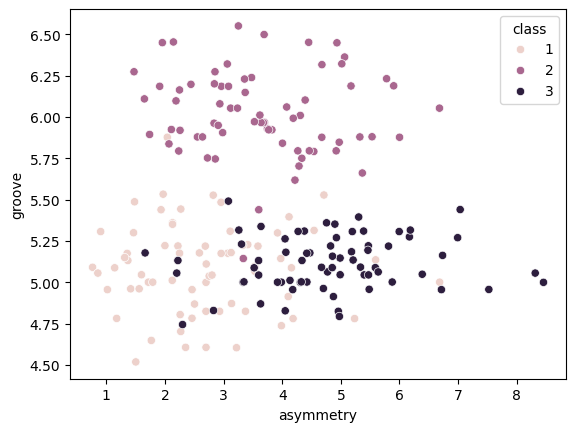

In [11]:
for i in range(len(cols) - 1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
        plt.show()

# K means Clustering 

In [12]:
from sklearn.cluster import KMeans

In [39]:
x = "compactness"
y = "asymmetry"
DATA = df[[x, y]].values
DATA

array([[0.871 , 2.221 ],
       [0.8811, 1.018 ],
       [0.905 , 2.699 ],
       [0.8955, 2.259 ],
       [0.9034, 1.355 ],
       [0.8951, 2.462 ],
       [0.8799, 3.586 ],
       [0.8911, 2.7   ],
       [0.8747, 2.04  ],
       [0.888 , 1.969 ],
       [0.8696, 4.543 ],
       [0.8796, 1.717 ],
       [0.888 , 3.986 ],
       [0.8759, 3.136 ],
       [0.8744, 2.932 ],
       [0.8993, 4.185 ],
       [0.9183, 5.234 ],
       [0.9058, 1.599 ],
       [0.9153, 1.767 ],
       [0.8686, 4.102 ],
       [0.8584, 3.072 ],
       [0.8722, 2.688 ],
       [0.8988, 0.7651],
       [0.8664, 1.415 ],
       [0.8657, 1.791 ],
       [0.8849, 0.903 ],
       [0.8641, 3.373 ],
       [0.8564, 2.504 ],
       [0.882 , 2.754 ],
       [0.8604, 3.531 ],
       [0.8662, 0.8551],
       [0.8724, 3.412 ],
       [0.8529, 3.92  ],
       [0.8728, 2.124 ],
       [0.8779, 2.129 ],
       [0.9   , 2.27  ],
       [0.8734, 2.823 ],
       [0.9079, 2.956 ],
       [0.8823, 3.112 ],
       [0.8944, 6.685 ],


In [40]:
kmeans = KMeans(n_clusters=3).fit(DATA)

c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
clusters = kmeans.labels_
clusters

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1])

In [42]:
cluster_df = pd.DataFrame(np.hstack((DATA, clusters.reshape(-1,1))), columns=[x, y, "class"])

In [43]:
cluster_df

,compactness,asymmetry,class
0,0.8710,2.221,2.0
1,0.8811,1.018,2.0
2,0.9050,2.699,2.0
3,0.8955,2.259,2.0
4,0.9034,1.355,2.0
...,...,...,...
205,0.8783,3.631,0.0
206,0.8511,4.325,0.0
207,0.8883,8.315,1.0
208,0.8521,3.598,0.0


[]

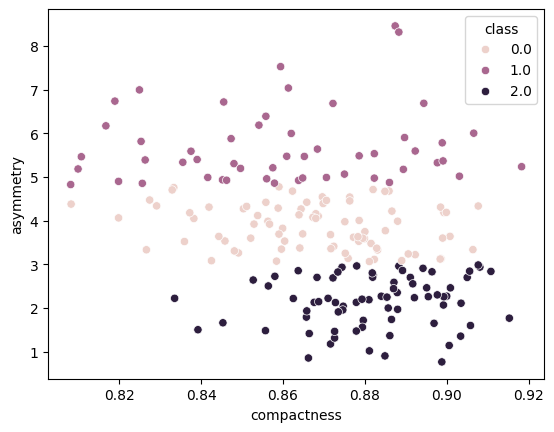

In [44]:
# K Means classes 
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

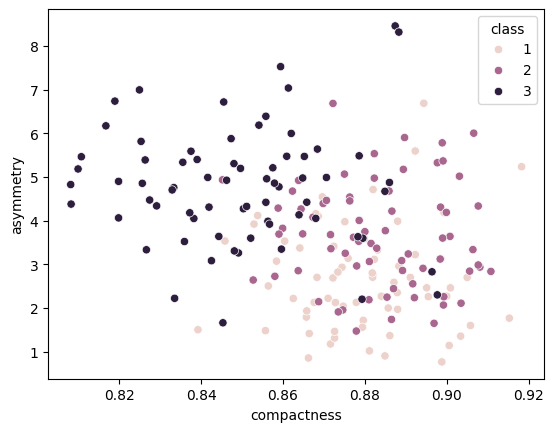

In [45]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

## Higher Dimentions

In [46]:
X = df[cols[:-1]].values

In [47]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1,1))), columns=df.columns)

c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]

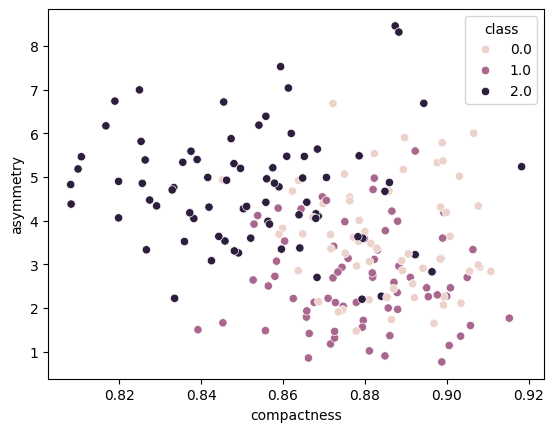

In [48]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

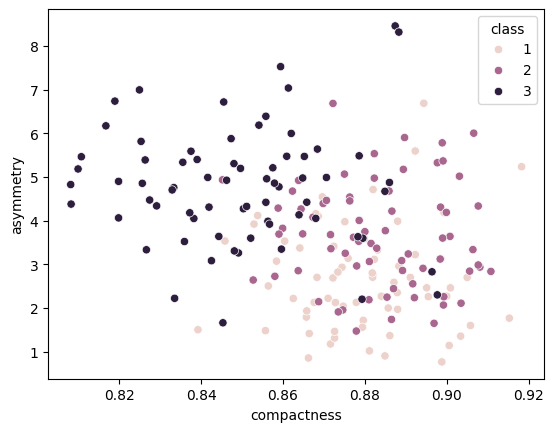

In [49]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=df)
plt.plot()

# PCA

In [52]:
X.shape

(210, 7)

In [50]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [54]:
transformed_x.shape

(210, 2)

In [55]:
transformed_x

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442],
       [-0.47693801, -1.33649437],
       [-0.18483472, -0.15036441],
       [-0.78062962, -1.12979883],
       [ 2.2821081 , -1.3600169 ],
       [ 1.97854147, -1.49468793],
       [ 0.36912295,  0.88672251],
       [-0.7110212 , -2.1066373 ],
       [-1.21370535,  0.09468789],
       [-1.16908541, -0.7429629 ],
       [-1.19272176, -0.95326816],
       [-0.50817121,  0.37795842],
       [-1.37469698,  1.32290559],
       [ 1.05726438, -2.01562875],
       [-0.1509611 , -2.02235813],
       [-2.46241293,  0.07374738],
       [-0.6313321 , -0.71830566],
       [-0.68969866, -1.11182531],
       [ 1.40769072, -2.80658086],
       [-2.84267672, -2.66880642],
       [ 0.43326822, -1.88984464],
       [ 1.81289158, -2.60002176],
       [-2.02131332, -0.60874333],
       [-2.19571862, -1.49837622],
       [-0.74446884,

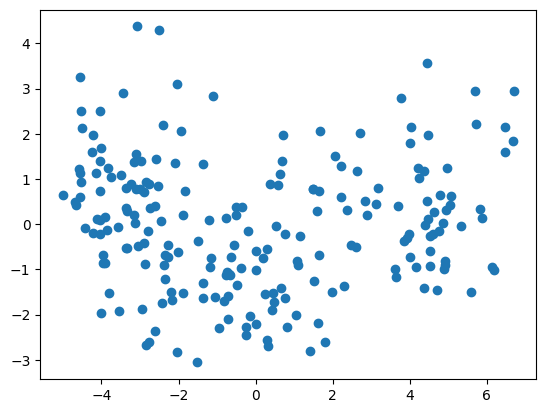

In [56]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [57]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1,1))), columns=["pca1", "pca2", "class"])

In [58]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

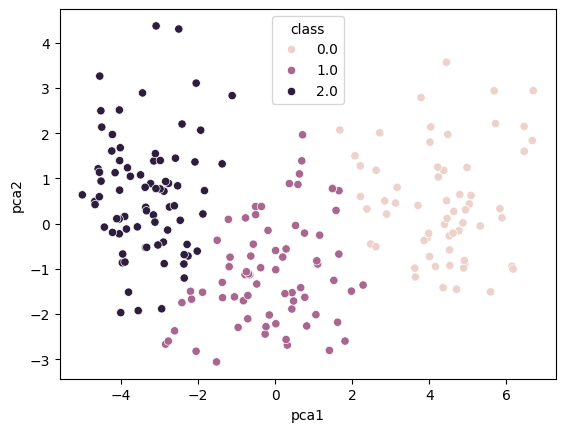

In [59]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.plot()

[]

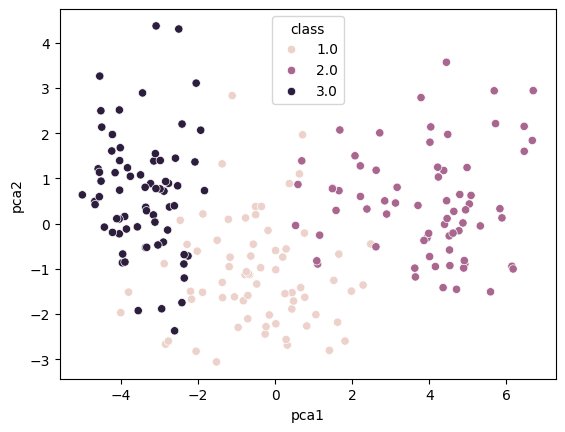

In [60]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()